<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/0514/07_%E1%84%8B%E1%85%A9%E1%86%AB%E1%84%85%E1%85%A1%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%89%E1%85%AD%E1%84%91%E1%85%B5%E1%86%BC%E1%84%92%E1%85%A2%E1%84%8B%E1%85%AC%E1%84%91%E1%85%A1%E1%86%AB%E1%84%86%E1%85%A2_Pandas%E1%84%86%E1%85%B5%E1%86%BE%E1%84%89%E1%85%B5%E1%84%80%E1%85%A1%E1%86%A8%E1%84%92%E1%85%AA(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8)%ED%98%84%EC%B9%98%EC%9A%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [120]:
import matplotlib as mpl
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

#마이너스 깨짐현상
mpl.rc('axes', unicode_minus=False)

Text(0.5, 1.0, '한글')

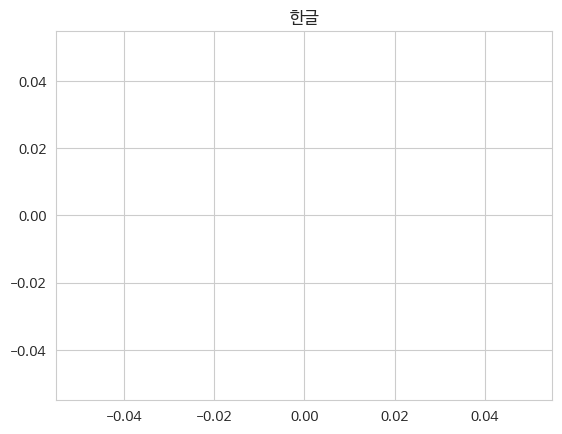

In [106]:
plt.plot()
plt.title('한글')

# 국가 대륙별 상품군별 온라인쇼핑 해외직접판매액 분석

URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

필요 라이브러리 호출
- 분석에 필요한 라이브러리
- 시각화에 필요한 라이브러리
- 시각화 폰트 및 깨짐현상 방지 코드

In [5]:
# 필요 라이브러리
import pandas as pd
import numpy as np

데이터 로드하기

In [ ]:
!gdown --id 1PeyV_XaLrgFIvUW9XBuRqFapprmhG9tp

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PeyV_XaLrgFIvUW9XBuRqFapprmhG9tp
To: /content/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20220313095440.csv
100% 62.9k/62.9k [00:00<00:00, 26.4MB/s]


In [56]:
df = pd.read_csv('101_DT_1KE10081_20230514173209.csv', encoding = 'cp949')
print(df.shape)
df.head(5)

(969, 38)


,지역별,상품군별,판매유형별,항목,단위,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,...,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,Unnamed: 37
0,합계,합계,계,해외직접판매액[백만원],백만원,148272.0,153641.0,163999.0,213216.0,269101.0,...,1881628,1531212,1290332,1656729,1525174,1206923,1222986,1034913,926718,NaN
1,합계,합계,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,1655635,1297490,1051987,1410967,1247495,972384,974415,795824,681168,NaN
2,합계,합계,면세점 이외,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,225993,233722,238345,245762,277679,234539,248571,239089,245550,NaN
3,합계,컴퓨터 및 주변기기,계,해외직접판매액[백만원],백만원,4915.0,4052.0,3912.0,3529.0,2903.0,...,3827,4142,3814,7722,3589,4239,4450,3612,2707,NaN
4,합계,컴퓨터 및 주변기기,면세점,해외직접판매액[백만원],백만원,NaN,NaN,NaN,NaN,NaN,...,70,113,-,3497,-,-,-,-,-,NaN


## 분석 시각화를 위한 데이터프레임 변형 (Pandas Melt)
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [57]:
df = df.drop(['항목','단위','Unnamed: 37'],axis =1)
df = df.melt(id_vars=['지역별','상품군별','판매유형별'], var_name = '기간', value_name='판매금액(백만원)')
df = df.rename(columns = {'지역별' : '국가(대륙)별'})
df = df.dropna(axis=0)
print(df.shape)
df.head()

(21180, 5)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원)
0,합계,합계,계,2014.1/4,148272.0
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0
6,합계,가전·전자·통신기기,계,2014.1/4,13259.0
15,합계,소프트웨어,계,2014.1/4,361.0
18,합계,서 적,계,2014.1/4,1563.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21180 entries, 0 to 31007
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   국가(대륙)별    21180 non-null  object
 1   상품군별       21180 non-null  object
 2   판매유형별      21180 non-null  object
 3   기간         21180 non-null  object
 4   판매금액(백만원)  21180 non-null  object
dtypes: object(5)
memory usage: 992.8+ KB


# 데이터 전처리

1) 기간에서 연도를 분리하기

In [58]:
df['연도'] = df['기간'].map(lambda x: int(x.split('.')[0])) # 앞에 0을 못빼서 구글링 해서 찾아옴/ 이유 모름
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도
0,합계,합계,계,2014.1/4,148272.0,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014
6,합계,가전·전자·통신기기,계,2014.1/4,13259.0,2014
15,합계,소프트웨어,계,2014.1/4,361.0,2014
18,합계,서 적,계,2014.1/4,1563.0,2014


2) 기간에서 분기를 분리하기

In [59]:
df['분기'] = (str(df['기간']).split('/')[0]).split('.')[1]
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
6,합계,가전·전자·통신기기,계,2014.1/4,13259.0,2014,1
15,합계,소프트웨어,계,2014.1/4,361.0,2014,1
18,합계,서 적,계,2014.1/4,1563.0,2014,1


3) 금액을 수치 데이터로 변경

In [60]:
df['판매금액(백만원)'] =df['판매금액(백만원)'].replace('-').astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
6,합계,가전·전자·통신기기,계,2014.1/4,13259.0,2014,1
15,합계,소프트웨어,계,2014.1/4,361.0,2014,1
18,합계,서 적,계,2014.1/4,1563.0,2014,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21180 entries, 0 to 31007
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가(대륙)별    21180 non-null  object 
 1   상품군별       21180 non-null  object 
 2   판매유형별      21180 non-null  object 
 3   기간         21180 non-null  object 
 4   판매금액(백만원)  21180 non-null  float64
 5   연도         21180 non-null  object 
 6   분기         21180 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.8+ MB


4) 국가 대륙별 합계와 상품군별 합계는 따로 구할 수 있기 때문에 제거하는 것이 필요해요

In [61]:
print(df.shape)

# 국가대륙별 합계, 상품군별 합계 제거 

df = df[(df['국가(대륙)별'] != '합계')&(df['상품군별'] != '합계')]

print(df.shape)

df.head()

(21180, 7)
(18792, 7)


,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
105,중국,컴퓨터 및 주변기기,계,2014.1/4,32.0,2014,1
108,중국,가전·전자·통신기기,계,2014.1/4,761.0,2014,1
117,중국,소프트웨어,계,2014.1/4,126.0,2014,1
120,중국,서 적,계,2014.1/4,225.0,2014,1
123,중국,사무·문구,계,2014.1/4,6.0,2014,1


# 연도별 판매액 시각화

Q1. 판매유형별 == '계' 데이터를 추출해보자.(df_total로 변수 저장)

In [62]:
df_total = df[df['판매유형별']=='계']
print(df_total.shape)

(7272, 7)


In [63]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
105,중국,컴퓨터 및 주변기기,계,2014.1/4,32.0,2014,1
108,중국,가전·전자·통신기기,계,2014.1/4,761.0,2014,1
117,중국,소프트웨어,계,2014.1/4,126.0,2014,1
120,중국,서 적,계,2014.1/4,225.0,2014,1
123,중국,사무·문구,계,2014.1/4,6.0,2014,1
...,...,...,...,...,...,...,...
30993,기타,아동·유아용품,계,2021.4/4,750.0,2021,1
30996,기타,음·식료품,계,2021.4/4,41.0,2021,1
30999,기타,농축수산물,계,2021.4/4,29.0,2021,1
31002,기타,생활·자동차용품,계,2021.4/4,1081.0,2021,1


Q2. 연도별, 판매액(백만원)에 대한 Line Plot을 그려보자.

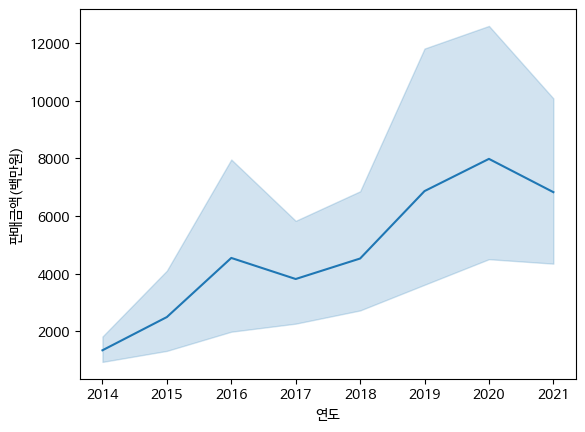

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data = df_total, x= '연도',  y= '판매금액(백만원)')

plt.show()

In [69]:
# 연도별, 판매액(백만원)의 평균을 구해보세요 

temp = df.groupby(df['연도'])[['판매금액(백만원)']].mean

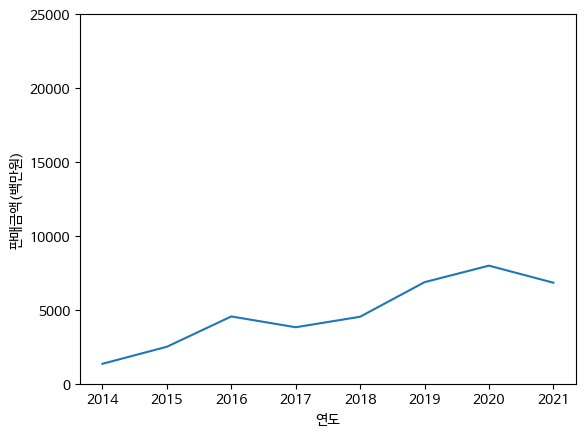

In [70]:
#@title
g = sns.lineplot(data = df_total, x = '연도', y = '판매금액(백만원)', err_style=None)
g.set(ylim = (0, 25000))

plt.show()

Q3. 상품군별 연도별, 판매액에 대한 Line Plot을 그려보자.

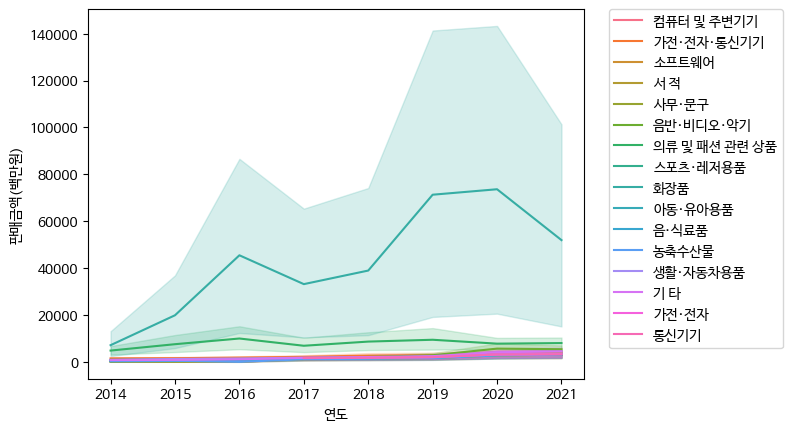

In [71]:
sns.lineplot(data=df_total, x='연도', y='판매금액(백만원)',hue ='상품군별')

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.) # 1.05 밖에 표시
plt.show()

Q4. 상품군별로 평균 판매금액을 내림차순으로 출력하세요. 

In [72]:
df_mean1 = pd.DataFrame(df.groupby("상품군별")['판매금액(백만원)'].mean())
df_mean1.sort_values(['판매금액(백만원)'],ascending=False)

,판매금액(백만원)
상품군별,
화장품,35425.659933
의류 및 패션 관련 상품,6259.569024
음반·비디오·악기,3278.785354
기 타,2758.519360
가전·전자·통신기기,2565.077441
가전·전자,2375.325000
통신기기,2375.325000
생활·자동차용품,2357.037037
서 적,2147.606902


# 화장품의 온라인 쇼핑 직접 판매액

Q5. df_total 변수에서 상품군별 == '화장품' 데이터를 df_cosmetic 변수에 저장해보자.

In [80]:
df_cosmetic =  df_total[ df_total['상품군별']=='화장품']
df_cosmetic = df_cosmetic.dropna(axis=0)
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,판매금액(백만원),연도,분기
135,중국,화장품,계,2014.1/4,32235.0,2014,1
186,일본,화장품,계,2014.1/4,1034.0,2014,1
237,아세안,화장품,계,2014.1/4,398.0,2014,1
288,중동,화장품,계,2014.1/4,418.0,2014,1
441,미국,화장품,계,2014.1/4,3740.0,2014,1
...,...,...,...,...,...,...,...
30786,기타 유럽,화장품,계,2021.4/4,361.0,2021,1
30837,대양주,화장품,계,2021.4/4,239.0,2021,1
30888,중남미,화장품,계,2021.4/4,77.0,2021,1
30939,아프리카,화장품,계,2021.4/4,63.0,2021,1


Q6. 화장품 판매액에 대한 기간별 금액 데이터 시각화

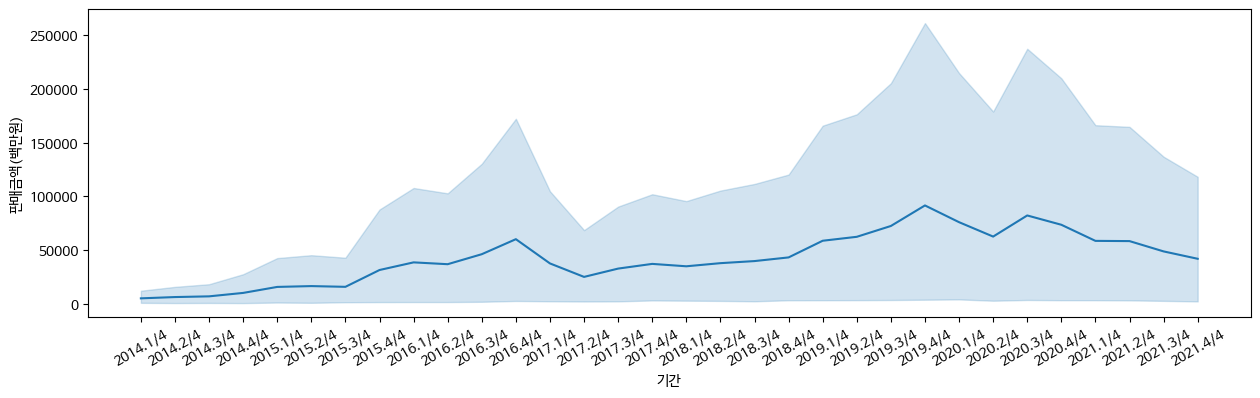

In [81]:
plt.figure(figsize = (15,4))

sns.lineplot(data = df_cosmetic, x = '기간', y = '판매금액(백만원)')
plt.xticks(rotation = 30)
plt.show()

Q7. 국가 대륙별로 다른 색상으로 표현해보기.

2015년의 국가별 화장품 매출

- 막대그래프로 시각화해보세요

<BarContainer object of 468 artists>

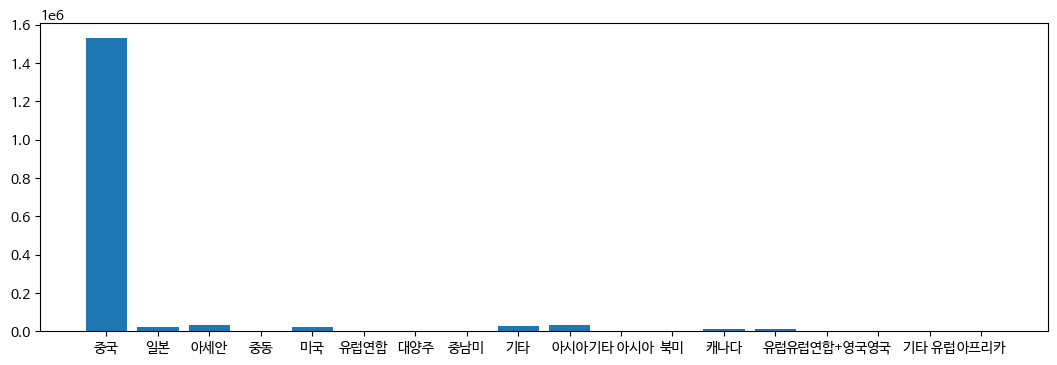

In [88]:
plt.figure(figsize = (13,4))
plt.bar(df_cosmetic['국가(대륙)별'],df_cosmetic['판매금액(백만원)'])

- 상자그림으로 시각화해보세요

<Axes: xlabel='국가(대륙)별', ylabel='판매금액(백만원)'>

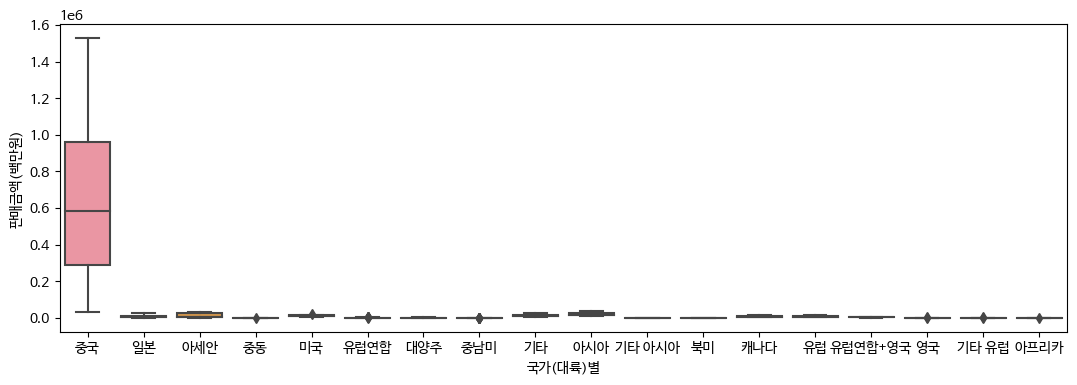

In [87]:
plt.figure(figsize = (13,4))

sns.boxplot(data = df_cosmetic, x= '국가(대륙)별', y= '판매금액(백만원)')

Q8. 중국을 제외하고 국가별로 다른 색상으로 표현하기.

<Axes: xlabel='판매금액(백만원)', ylabel='국가(대륙)별'>

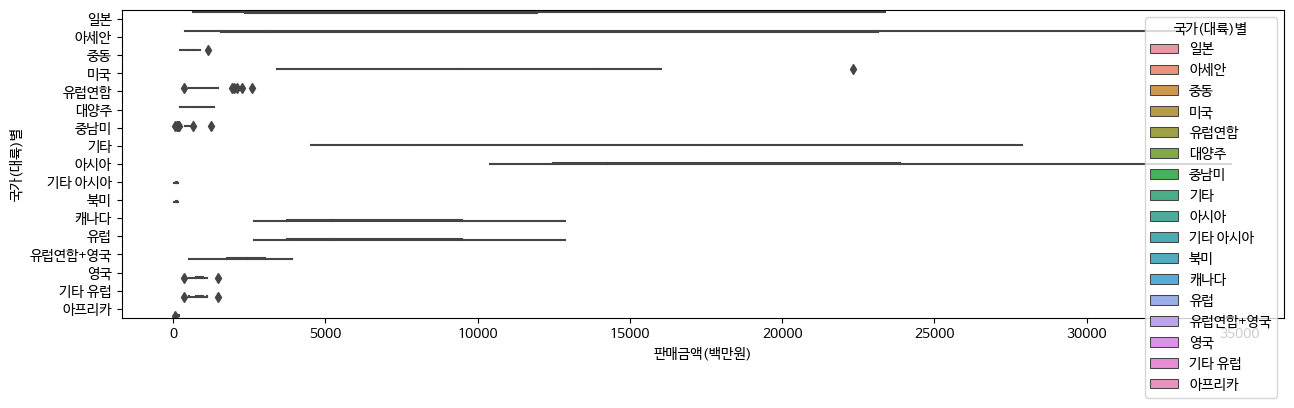

In [92]:
plt.figure(figsize = (15,4))

sns.boxplot(data = df_cosmetic[df_cosmetic['국가(대륙)별']!='중국'], y= '국가(대륙)별', x= '판매금액(백만원)',hue ='국가(대륙)별')

Q9. 판매유형별 화장품 판매액에 대한 기간별 금액 데이터를 시각화하기(Line plot)

In [93]:
df_sub = df[(df['판매유형별'] != '계') & (df['상품군별'] == '화장품')]

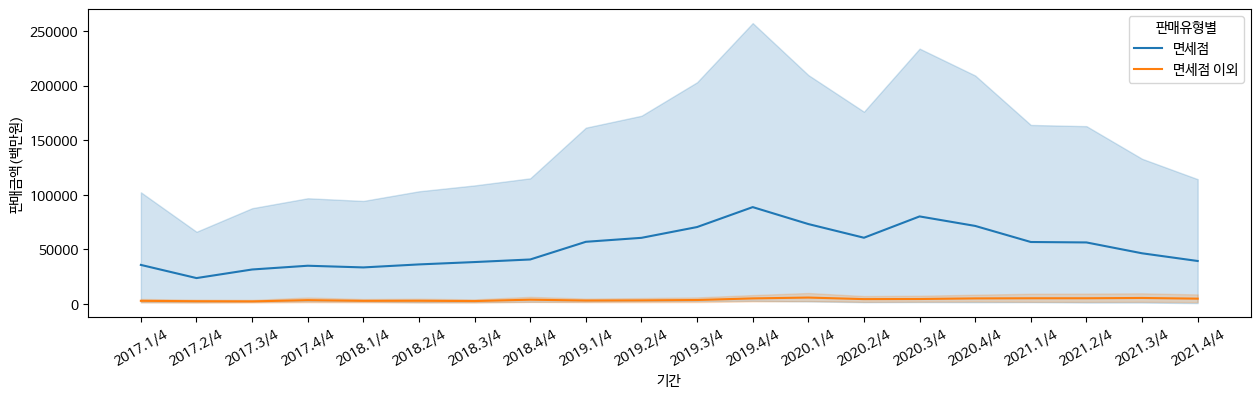

In [94]:
plt.figure(figsize = (15,4))

sns.lineplot(data=df_sub, x='기간', y='판매금액(백만원)', hue = '판매유형별')


plt.xticks(rotation = 30)
plt.show()

Q10. 면세점 이외의 데이터들도 증가 했는지 확인해보기

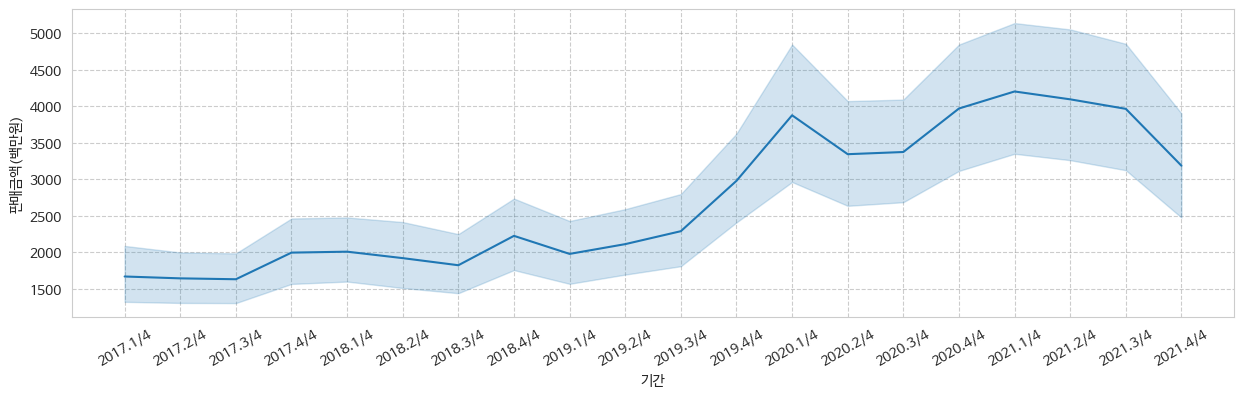

In [107]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)

sns.lineplot(data=df[df['판매유형별']=='면세점 이외'], x='기간', y='판매금액(백만원)')

plt.grid( alpha = 0.4          ## 투명도 설정 
         , linestyle = '--'   ## 선의 형태 설정
         , color = 'gray'     ## 뒷 배경의 선 색 설정
        )
# 띄어쓰기 잘하자.. 면세점이외라고 하니 안나왔다...
plt.show()

Q12. 국가별 기간에 따른 금액 데이터 시각화

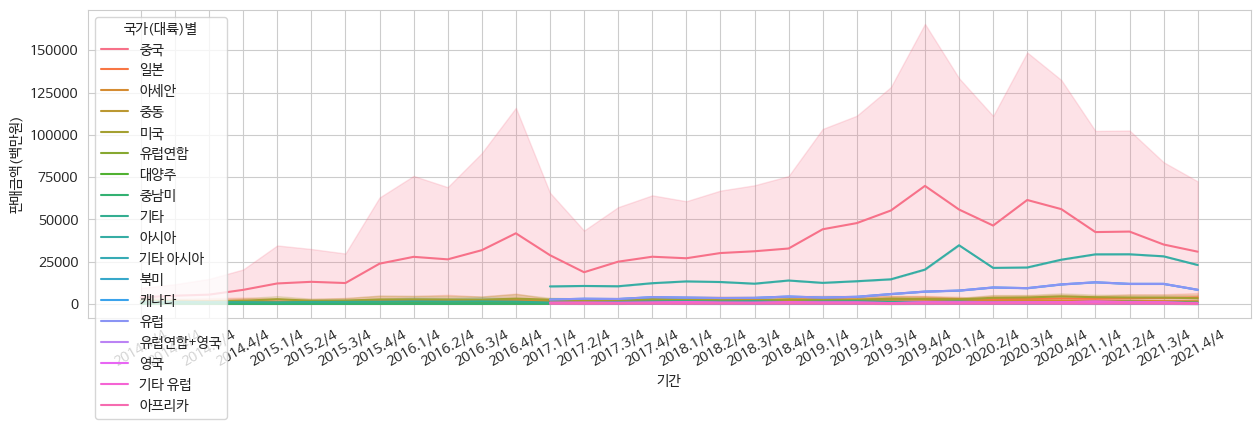

In [122]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df, x= '기간', y= '판매금액(백만원)',hue ='국가(대륙)별')
sns.set_style("whitegrid")
plt.show()

Q13. 국가대륙별, 연도별 합계 금액을 Pivot_table을 통해 구하기

In [114]:
result = pd.pivot_table(df, index = '국가(대륙)별', columns = '연도', values = '판매금액(백만원)', aggfunc = 'sum') 
#  pd.pivot_table(불러올 데이터, index = : 불러올 행 데이터, columns = : 불러올 열 데이터, values = :안에 채우는 데이터, aggfuns = : 사용할 함수)
result

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,66900.0,68252.0,83603.0,210759.0,286146.0,267378.0,196012.0,205376.0
기타 아시아,NaN,NaN,NaN,23472.0,19200.0,21408.0,25584.0,20544.0
기타 유럽,NaN,NaN,NaN,148320.0,179952.0,158304.0,187536.0,186480.0
대양주,18326.0,14641.0,19181.0,83260.0,73840.0,45659.0,67923.0,65181.0
미국,96363.0,132638.0,154721.0,480125.0,438438.0,516327.0,709008.0,725479.0
북미,NaN,NaN,NaN,23472.0,19200.0,21408.0,25584.0,20544.0
아세안,45311.0,58358.0,75496.0,384873.0,414090.0,500424.0,417124.0,325760.0
아시아,NaN,NaN,NaN,2108208.0,2511744.0,2926080.0,4988592.0,5283408.0
아프리카,NaN,NaN,NaN,26544.0,30720.0,26112.0,30000.0,27120.0


Q14. Heatmap을 통해 연도별, 국가별 합계 금액을 시각적으로 표현하기

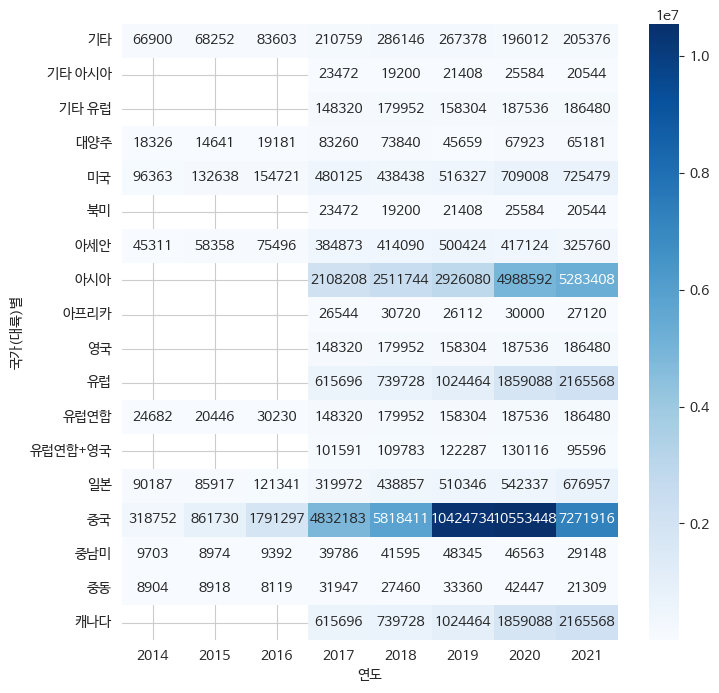

In [121]:
plt.figure(figsize = (8,8))

sns.heatmap(result, cmap ='Blues', annot=True, fmt='.0f')
plt.show()
# 히트맵 :
# sns.heatmap(data = '필요한 데이터 입력', annot = True  : 각 cell의 데이터 표기 유무, fmt = '.0%' : values(데이터의 값)값의 소수점 표기, vmin = 0 : 최소값 설정)